Numerical features:

- X2, x12, ... , X23


In [22]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

# metadata
# print(default_of_credit_card_clients.metadata)

# variable information
print(default_of_credit_card_clients.variables)

   name     role     type      demographic                 description units  \
0    ID       ID  Integer             None                        None  None   
1    X1  Feature  Integer             None                   LIMIT_BAL  None   
2    X2  Feature  Integer              Sex                         SEX  None   
3    X3  Feature  Integer  Education Level                   EDUCATION  None   
4    X4  Feature  Integer   Marital Status                    MARRIAGE  None   
5    X5  Feature  Integer              Age                         AGE  None   
6    X6  Feature  Integer             None                       PAY_0  None   
7    X7  Feature  Integer             None                       PAY_2  None   
8    X8  Feature  Integer             None                       PAY_3  None   
9    X9  Feature  Integer             None                       PAY_4  None   
10  X10  Feature  Integer             None                       PAY_5  None   
11  X11  Feature  Integer             No

In [23]:
# Create a list of strings from X1 and X12 to X24
numerical_features = [f"X{i}" for i in range(1, 24) if i == 1 or i >= 5]


# Print the list
print(numerical_features)

['X1', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


In [ ]:
# Splitting into categorical and numerical features
X_num = X[numerical_features]
X_cat = X.drop(columns=numerical_features)

In [ ]:
# scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=numerical_features)

In [10]:
# encoding categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
X_cat_encoded = encoder.fit_transform(X_cat)
X_cat_encoded = pd.DataFrame(
    X_cat_encoded.toarray(), columns=encoder.get_feature_names_out(X_cat.columns))
X_cat_encoded

,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
# concatenating the numerical and categorical features
X_final = pd.concat([X_num_scaled, X_cat_encoded], axis=1)
X_final

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
0,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,-0.134759,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,-1.059646,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,-0.674276,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Training the model


In [12]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42)

In [13]:
# create neural network model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100, 50),
                      max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/jukatz/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4232  455]
 [ 875  438]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4687
           1       0.49      0.33      0.40      1313

    accuracy                           0.78      6000
   macro avg       0.66      0.62      0.63      6000
weighted avg       0.75      0.78      0.76      6000



In [24]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(10,), (10, 10), (50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu', 'sigmoid'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Create a basic MLPClassifier
mlp = MLPClassifier(max_iter=10000)

# Set up the grid search
grid_search = GridSearchCV(
    estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

/Users/jukatz/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jukatz/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jukatz/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jukatz/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:111

Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


In [32]:
import tensorflow as tf
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from kerastuner.tuners import RandomSearch

# Example data (replace with your actual data)
# X, y should be your dataset features and labels
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to build the model


def build_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units_input', min_value=8, max_value=64, step=8),
        activation='tanh',
        input_shape=(X_train.shape[1],)
    ))
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units_hidden', min_value=8, max_value=64, step=8),
        activation='tanh'
    ))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


# Set up the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of different models to try
    executions_per_trial=1,  # Number of times to train each model
    directory='my_dir',
    project_name='helloworld'
)

# Perform the search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Set up TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(
    X_test, y_test), callbacks=[tensorboard_callback])

# Evaluate the model
model.evaluate(X_test, y_test)

# Save the model
model.save(f'model-{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}.h5')

Reloading Tuner from my_dir/helloworld/tuner0.json
Epoch 1/10


/Users/jukatz/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.7882 - loss: 0.4856 - val_accuracy: 0.8182 - val_loss: 0.4395
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.8165 - loss: 0.4392 - val_accuracy: 0.8155 - val_loss: 0.4380
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.8186 - loss: 0.4386 - val_accuracy: 0.8190 - val_loss: 0.4341
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.8151 - loss: 0.4396 - val_accuracy: 0.8148 - val_loss: 0.4372
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.8179 - loss: 0.4348 - val_accuracy: 0.8188 - val_loss: 0.4371
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.8211 - loss: 0.4279 - val_accuracy: 0.8173 - val_loss: 0.4364
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - accuracy: 0.8232 - loss: 0.4241 - val_accuracy: 0.8165 - val_loss: 0.4335
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.8245 - loss: 0.4225 - val_accurac

Decision tree model


[[3815  872]
 [ 780  533]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.39      1313

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



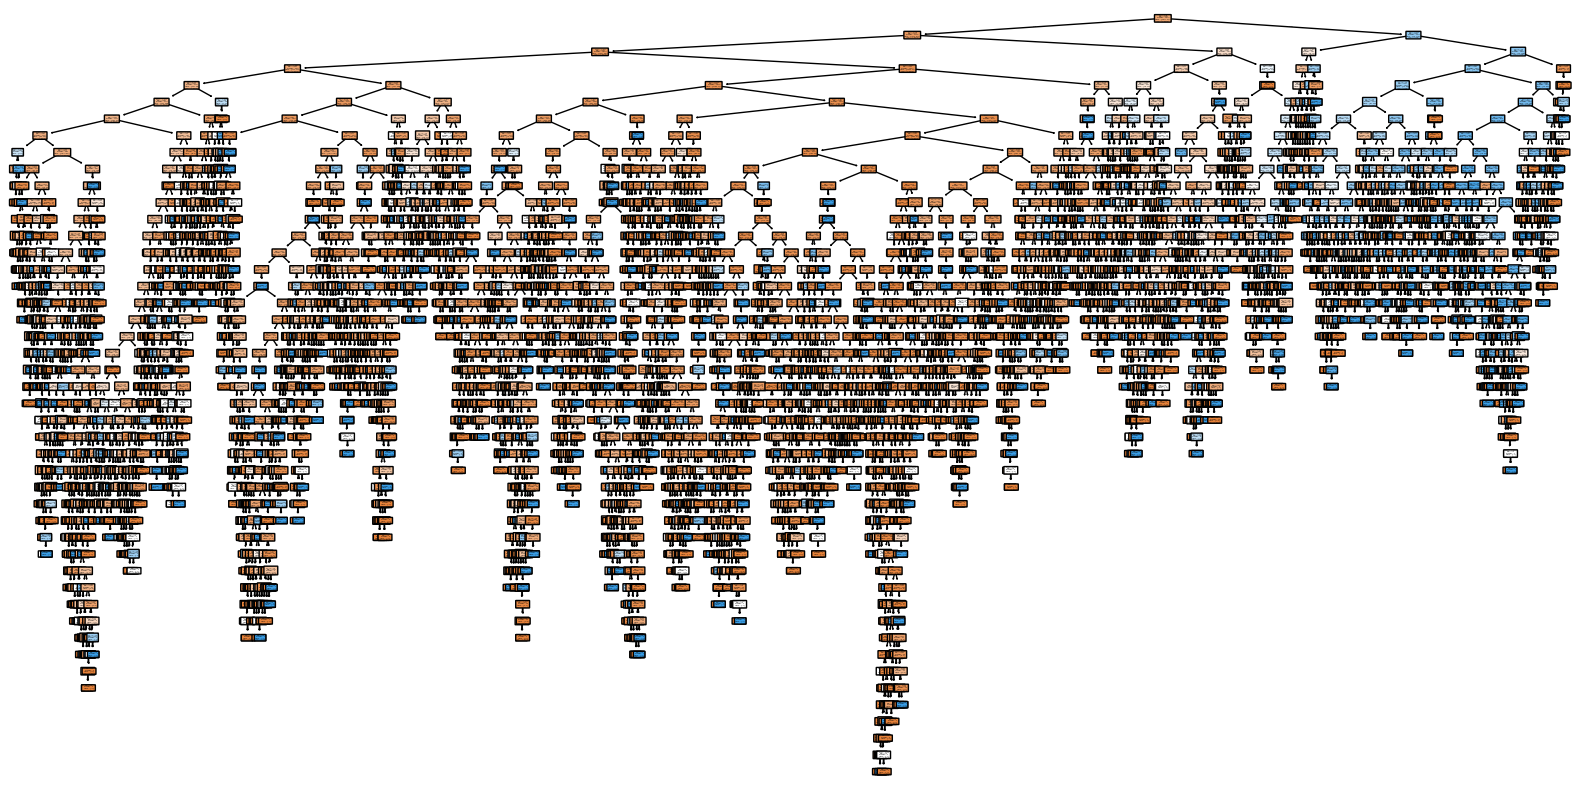

['decision_tree_model.pkl']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


# Make predictions
y_pred = clf.predict(X_test)


# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_final.columns,
          class_names=['No Default', 'Default'], rounded=True)
plt.savefig('decision_tree.png')
plt.show()


# Save the model
joblib.dump(clf, 'decision_tree_model.pkl')